In [53]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [54]:
# Import test and train datasets
df_train = pd.read_excel('Collapse_Result.xlsx')
#df_test = pd.read_excel('CollapseResults.xlsx')

# View first lines of training data
df_train.head(3)

,Date,WONo,Supplier,Grade,NomODIn,ODnGrade,NomWtLbPerFt,LengthIn,ApproxWeightLb,PipeNo,EndPlant,YsPsi,TsPsi,YbyT,CollapsePsig,WTDeg0,WTDeg45,WTDeg90,WTDeg135,WTDeg180,WTDeg225,WTDeg270,WTDeg315,AvgODPiTape,Ovality,PercentOvality,Eccentricity0180,Eccentricity45225,Eccentricity90270,Eccentricity135315,DbyTAvg,ThMax,ThMin,ThAvg,ThSTDEV
0,2018-07-19,5,Nexteel,L80EHC,9.625,9.625-L80EHC,38.97,77,250.0575,80054030,West,85500,96470,0.886286,4934,0.394,0.386,0.391,0.388,0.392,0.395,0.394,0.393,9.694,0.030,0.003095,0.005107,0.022981,0.007660,0.012767,24.753272,0.395,0.386,0.391625,0.003159
1,2018-07-19,4,Marcegaglia,L80EHC,9.625,9.625-L80EHC,38.97,77,250.0575,80069068,West,93650,103900,0.901347,4812,0.395,0.400,0.397,0.397,0.397,0.399,0.399,0.395,9.677,0.032,0.003307,0.005033,0.002517,0.005033,0.005033,24.352312,0.400,0.395,0.397375,0.001847
2,2018-07-19,4,Marcegaglia,L80EHC,9.625,9.625-L80EHC,38.97,77,250.0575,80071026,East,89310,99840,0.894531,4678,0.387,0.395,0.385,0.398,0.395,0.398,0.392,0.393,9.679,0.053,0.005476,0.020363,0.007636,0.017817,0.012727,24.636335,0.398,0.385,0.392875,0.004764


In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                211 non-null    datetime64[ns]
 1   WONo                211 non-null    int64         
 2   Supplier            211 non-null    object        
 3   Grade               211 non-null    object        
 4   NomODIn             211 non-null    float64       
 5   ODnGrade            211 non-null    object        
 6   NomWtLbPerFt        211 non-null    float64       
 7   LengthIn            211 non-null    int64         
 8   ApproxWeightLb      211 non-null    float64       
 9   PipeNo              211 non-null    object        
 10  EndPlant            211 non-null    object        
 11  YsPsi               211 non-null    int64         
 12  TsPsi               211 non-null    int64         
 13  YbyT                211 non-null    float64       

In [56]:
df_train.describe()

,WONo,NomODIn,NomWtLbPerFt,LengthIn,ApproxWeightLb,YsPsi,TsPsi,YbyT,CollapsePsig,WTDeg0,WTDeg45,WTDeg90,WTDeg135,WTDeg180,WTDeg225,WTDeg270,WTDeg315,AvgODPiTape,Ovality,PercentOvality,Eccentricity0180,Eccentricity45225,Eccentricity90270,Eccentricity135315,DbyTAvg,ThMax,ThMin,ThAvg,ThSTDEV
count,211.000000,211.000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,54.417062,9.625,38.884028,76.843602,249.222026,89338.625592,101391.990521,0.881480,4864.611374,0.388303,0.390749,0.389716,0.390071,0.390654,0.390408,0.389635,0.390711,9.705336,0.021829,0.002249,0.014555,0.007145,0.006131,0.007590,24.889049,0.394479,0.384995,0.390031,0.003078
std,34.879336,0.000,1.319776,2.271814,12.209461,2484.599710,3272.006348,0.020769,261.058998,0.007736,0.006500,0.006636,0.006466,0.006244,0.006293,0.005981,0.006068,0.018537,0.010424,0.001072,0.011741,0.005555,0.004893,0.006431,0.380088,0.006293,0.006484,0.005756,0.001320
min,3.000000,9.625,19.830000,44.000000,72.710000,83350.000000,95110.000000,0.823782,4148.000000,0.361000,0.376000,0.374000,0.372000,0.368000,0.375000,0.378000,0.378000,9.670000,0.002000,0.000205,0.000000,0.000000,0.000000,0.000000,23.200239,0.380000,0.361000,0.375375,0.000926
25%,22.000000,9.625,38.970000,77.000000,250.057500,87405.000000,98675.000000,0.866008,4712.000000,0.383000,0.387000,0.385000,0.386000,0.387000,0.386000,0.386000,0.387000,9.692000,0.015000,0.001546,0.005114,0.002594,0.002560,0.002597,24.714650,0.391000,0.381000,0.386000,0.002136
50%,49.000000,9.625,38.970000,77.000000,250.057500,89100.000000,101100.000000,0.877571,4872.000000,0.388000,0.391000,0.390000,0.390000,0.391000,0.390000,0.390000,0.390000,9.700000,0.018000,0.001859,0.012739,0.005217,0.005145,0.007638,24.845612,0.394000,0.385000,0.390250,0.002748
75%,75.000000,9.625,38.970000,77.000000,250.057500,91035.000000,103900.000000,0.893441,5030.000000,0.392500,0.394000,0.393000,0.393000,0.393000,0.393000,0.393000,0.393000,9.719000,0.028500,0.002932,0.021409,0.010188,0.007856,0.010250,25.138593,0.397000,0.388000,0.392500,0.003940
max,132.000000,9.625,39.970000,77.000000,250.100000,94990.000000,108900.000000,0.953788,5833.000000,0.419000,0.420000,0.420000,0.420000,0.416000,0.418000,0.416000,0.419000,9.792000,0.058000,0.005960,0.072751,0.036223,0.023196,0.044185,25.920746,0.420000,0.415000,0.417625,0.009790


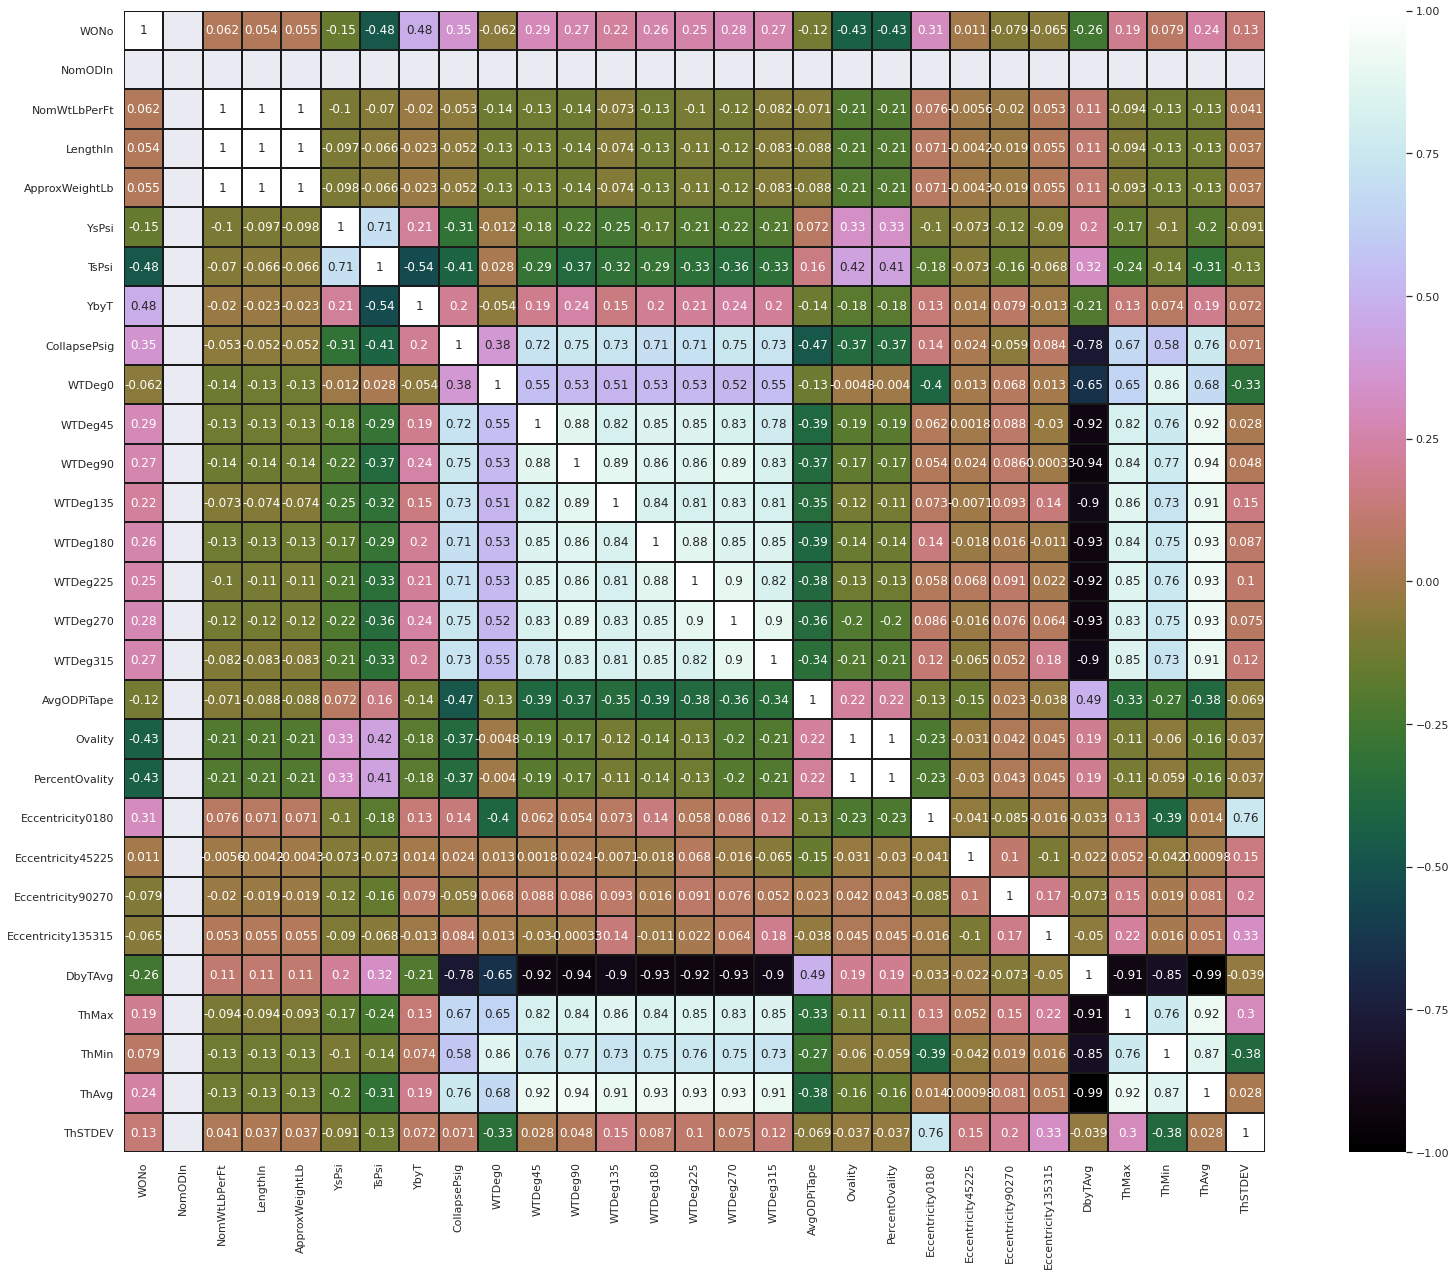

In [57]:
fig=plt.gcf()
fig.set_size_inches(30,21)
fig=sns.heatmap(df_train.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [58]:
df_train2 = df_train.drop(["WTDeg0","WTDeg45","WTDeg90", "WTDeg135", "WTDeg180", "WTDeg225", "WTDeg270", "WTDeg315", "ThMax", "ThMin","DbyTAvg", "PercentOvality", "NomODIn","NomWtLbPerFt", "ApproxWeightLb","PipeNo"], axis = 1)
df_train2.head(3)

,Date,WONo,Supplier,Grade,ODnGrade,LengthIn,EndPlant,YsPsi,TsPsi,YbyT,CollapsePsig,AvgODPiTape,Ovality,Eccentricity0180,Eccentricity45225,Eccentricity90270,Eccentricity135315,ThAvg,ThSTDEV
0,2018-07-19,5,Nexteel,L80EHC,9.625-L80EHC,77,West,85500,96470,0.886286,4934,9.694,0.030,0.005107,0.022981,0.007660,0.012767,0.391625,0.003159
1,2018-07-19,4,Marcegaglia,L80EHC,9.625-L80EHC,77,West,93650,103900,0.901347,4812,9.677,0.032,0.005033,0.002517,0.005033,0.005033,0.397375,0.001847
2,2018-07-19,4,Marcegaglia,L80EHC,9.625-L80EHC,77,East,89310,99840,0.894531,4678,9.679,0.053,0.020363,0.007636,0.017817,0.012727,0.392875,0.004764


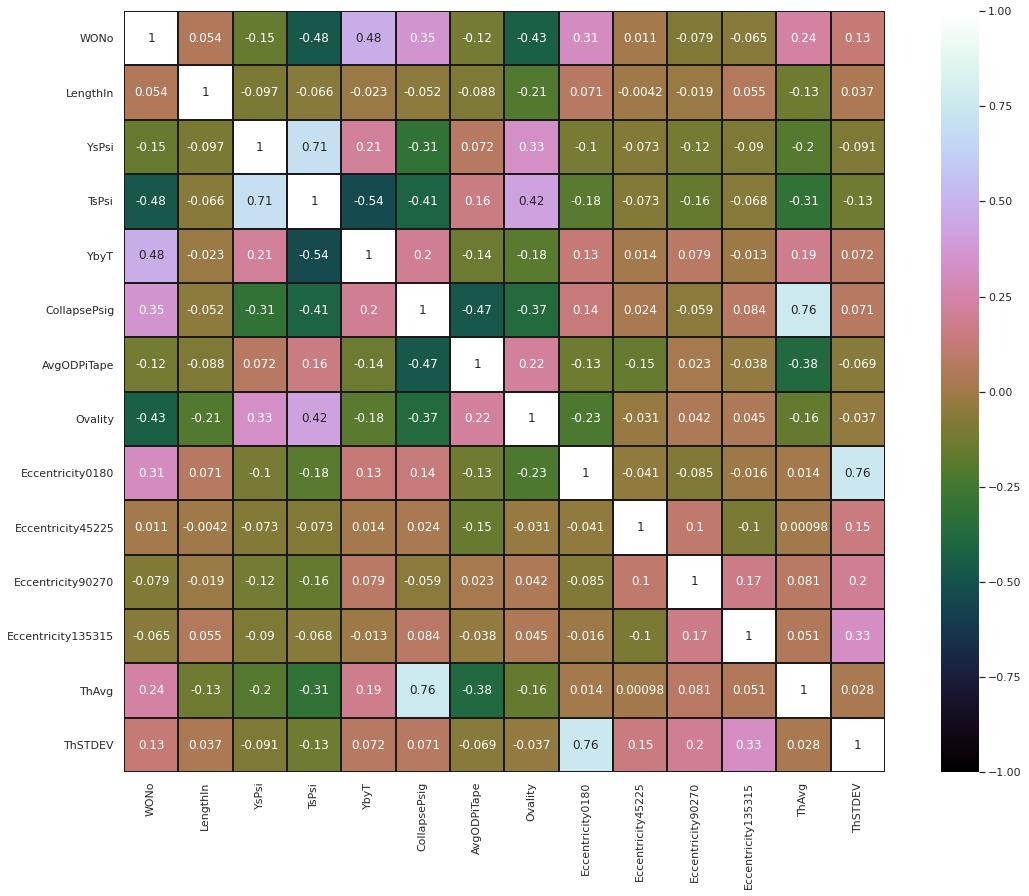

In [59]:
fig=plt.gcf()
fig.set_size_inches(20,14)
fig=sns.heatmap(df_train2.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


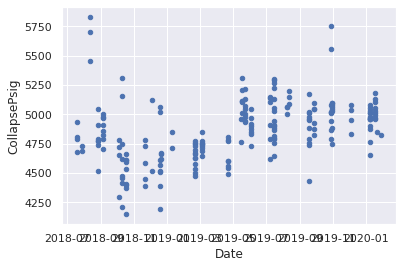

In [60]:
sp1 = df_train2.plot ("Date", "CollapsePsig", kind = 'scatter')

In [61]:
df_train2['month_year'] = pd.to_datetime(df_train2['Date']).dt.to_period('M')
df_train2.head()

,Date,WONo,Supplier,Grade,ODnGrade,LengthIn,EndPlant,YsPsi,TsPsi,YbyT,CollapsePsig,AvgODPiTape,Ovality,Eccentricity0180,Eccentricity45225,Eccentricity90270,Eccentricity135315,ThAvg,ThSTDEV,month_year
0,2018-07-19,5,Nexteel,L80EHC,9.625-L80EHC,77,West,85500,96470,0.886286,4934,9.694,0.030,0.005107,0.022981,0.007660,0.012767,0.391625,0.003159,2018-07
1,2018-07-19,4,Marcegaglia,L80EHC,9.625-L80EHC,77,West,93650,103900,0.901347,4812,9.677,0.032,0.005033,0.002517,0.005033,0.005033,0.397375,0.001847,2018-07
2,2018-07-19,4,Marcegaglia,L80EHC,9.625-L80EHC,77,East,89310,99840,0.894531,4678,9.679,0.053,0.020363,0.007636,0.017817,0.012727,0.392875,0.004764,2018-07
3,2018-07-19,5,Nexteel,L80EHC,9.625-L80EHC,77,East,92280,103500,0.891594,4794,9.691,0.023,0.005091,0.005091,0.022908,0.005091,0.392875,0.004016,2018-07
4,2018-07-28,12,Chung Hung,L80EHC,9.625-L80EHC,77,West,90570,105100,0.861751,4690,9.701,0.014,0.007785,0.002595,0.005190,0.007785,0.385375,0.002387,2018-07


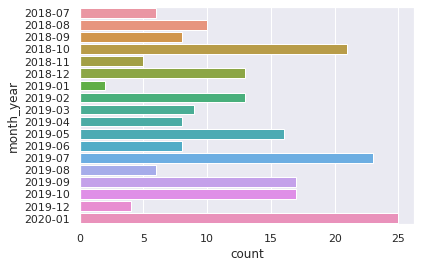

In [62]:
sns.countplot(y='month_year', data=df_train2)

In [63]:
df_train3 = df_train2[['month_year', 'CollapsePsig']].groupby('month_year').mean()
df_train3.head(20)

,CollapsePsig
month_year,
2018-07,4773.333333
2018-08,5054.800000
2018-09,4879.375000
2018-10,4581.571429
2018-11,4588.000000
2018-12,4651.846154
2019-01,4783.500000
2019-02,4644.384615
2019-03,4739.222222


In [64]:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 18 entries, 2018-07 to 2020-01
Freq: M
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CollapsePsig  18 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


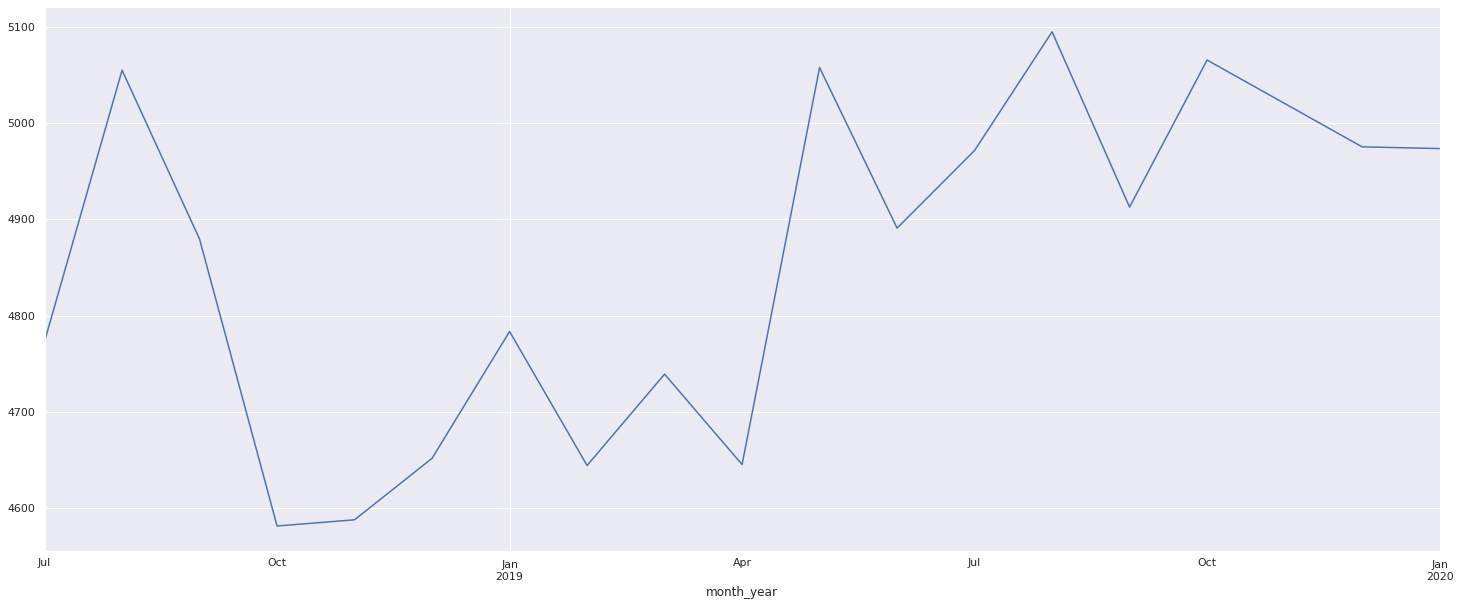

In [65]:
df_train3.CollapsePsig.plot(figsize = (25,10))

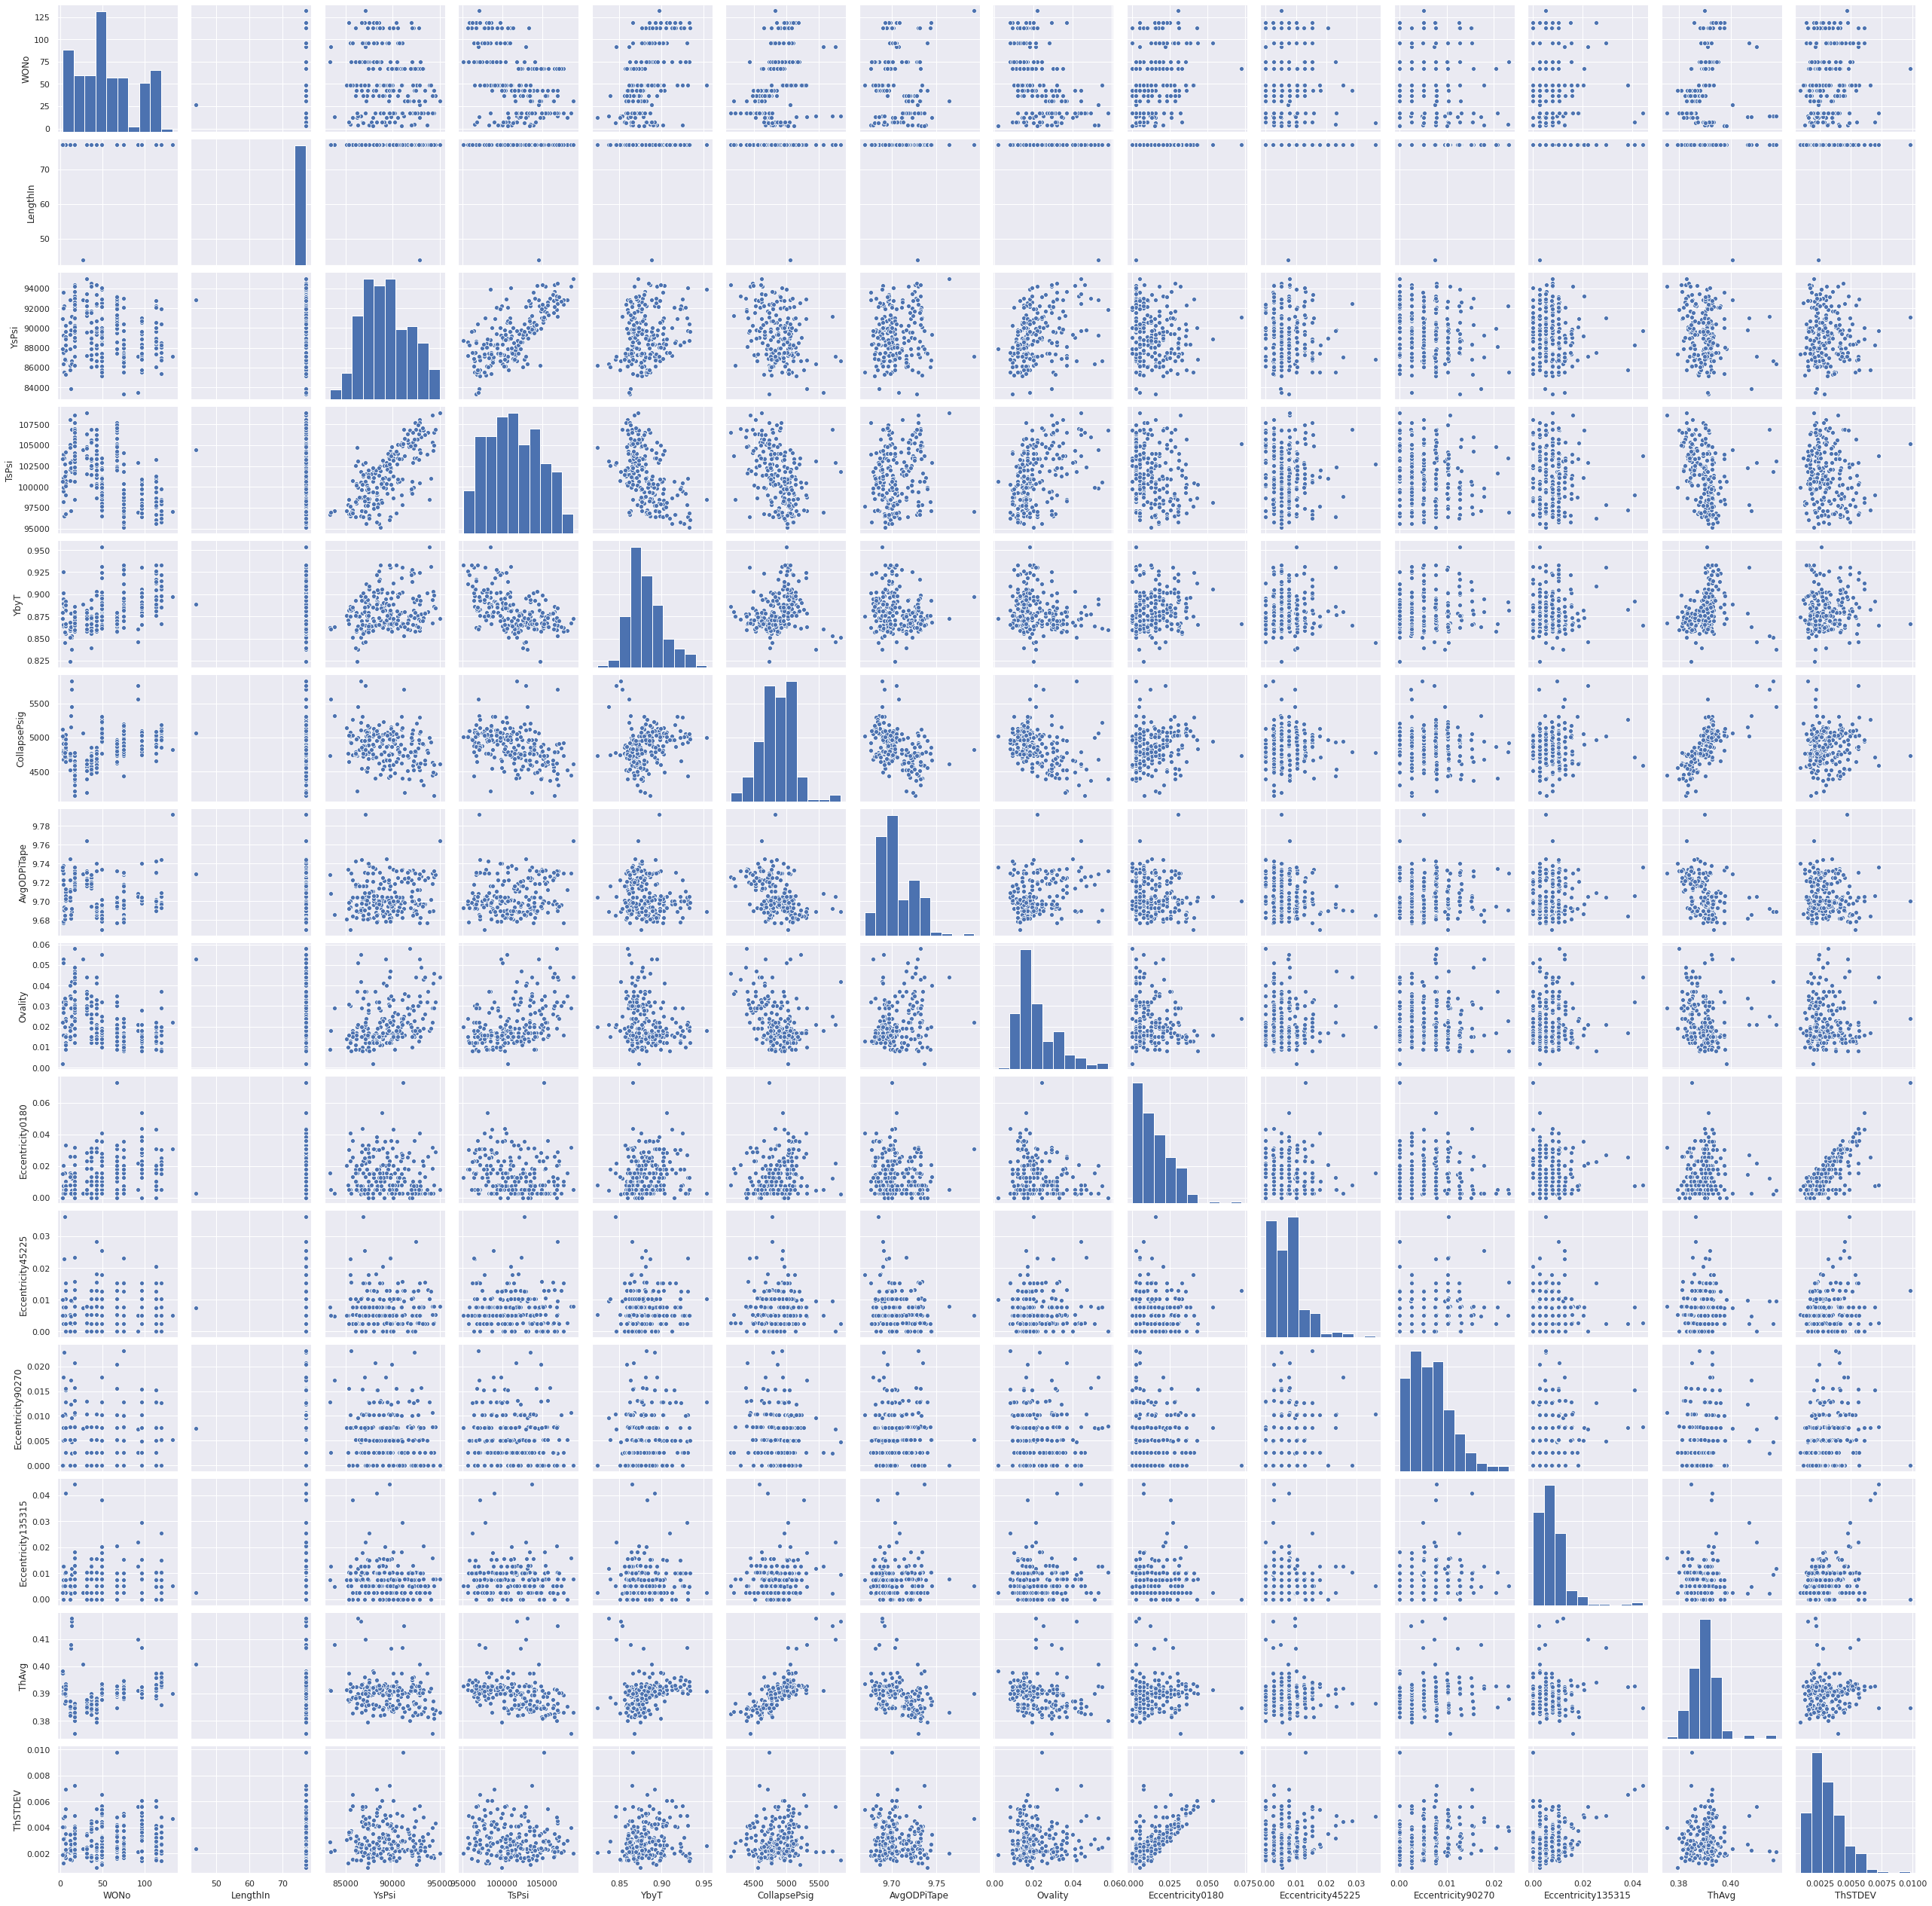

In [66]:
sns.pairplot(df_train2)

In [67]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                211 non-null    datetime64[ns]
 1   WONo                211 non-null    int64         
 2   Supplier            211 non-null    object        
 3   Grade               211 non-null    object        
 4   ODnGrade            211 non-null    object        
 5   LengthIn            211 non-null    int64         
 6   EndPlant            211 non-null    object        
 7   YsPsi               211 non-null    int64         
 8   TsPsi               211 non-null    int64         
 9   YbyT                211 non-null    float64       
 10  CollapsePsig        211 non-null    int64         
 11  AvgODPiTape         211 non-null    float64       
 12  Ovality             211 non-null    float64       
 13  Eccentricity0180    211 non-null    float64       

In [68]:
##Preparation of Dummy Variable
new_data = pd.get_dummies(df_train2, columns=['Supplier', 'Grade','ODnGrade', 'EndPlant'], drop_first=True)

In [69]:
new_data.tail(30)

,Date,WONo,LengthIn,YsPsi,TsPsi,YbyT,CollapsePsig,AvgODPiTape,Ovality,Eccentricity0180,Eccentricity45225,Eccentricity90270,Eccentricity135315,ThAvg,ThSTDEV,month_year,Supplier_CPW,Supplier_Chung Hung,Supplier_Husteel,Supplier_Marcegaglia,Supplier_Nexteel,Supplier_Pytco,Supplier_Tata,Supplier_Tuper,EndPlant_West
181,2019-10-29,96,77,89620,100900,0.888206,4751,9.701,0.018,0.020546,0.007705,0.000000,0.000000,0.389375,0.003114,2019-10,0,0,0,1,0,0,0,0,1
182,2019-12-03,96,77,87290,99680,0.875702,5080,9.701,0.009,0.017834,0.007643,0.000000,0.010191,0.392500,0.002976,2019-12,0,0,0,1,0,0,0,0,0
183,2019-12-03,96,77,85730,96830,0.885366,5036,9.704,0.015,0.036036,0.007722,0.000000,0.002574,0.388500,0.005682,2019-12,0,0,0,1,0,0,0,0,1
184,2019-12-03,96,77,87410,99750,0.876291,4954,9.740,0.010,0.000000,0.005128,0.012821,0.002564,0.390000,0.001690,2019-12,0,0,0,1,0,0,0,0,0
185,2019-12-03,96,77,86820,100300,0.865603,4831,9.704,0.008,0.043604,0.002565,0.015390,0.007695,0.389875,0.005617,2019-12,0,0,0,1,0,0,0,0,0
186,2020-01-07,113,77,89670,96080,0.933285,4978,9.699,0.012,0.005115,0.005115,0.005115,0.010230,0.391000,0.001604,2020-01,0,0,0,1,0,0,0,0,1
187,2020-01-07,113,77,90040,98660,0.912629,4963,9.700,0.016,0.043271,0.000000,0.005091,0.000000,0.392875,0.006081,2020-01,0,0,0,1,0,0,0,0,1
188,2020-01-07,113,77,88360,97600,0.905328,5051,9.694,0.019,0.017823,0.002546,0.015277,0.010185,0.392750,0.004132,2020-01,0,0,0,1,0,0,0,0,1
189,2020-01-07,113,77,87950,99370,0.885076,4903,9.730,0.015,0.015301,0.007651,0.000000,0.005100,0.392125,0.002900,2020-01,0,0,0,1,0,0,0,0,1
190,2020-01-07,113,77,92800,103300,0.898354,4961,9.702,0.013,0.005092,0.007638,0.005092,0.007638,0.392750,0.001488,2020-01,0,0,0,1,0,0,0,0,1


In [70]:
new_data.shape

(211, 25)

In [71]:
new_data.columns

Index(['Date', 'WONo', 'LengthIn', 'YsPsi', 'TsPsi', 'YbyT', 'CollapsePsig',
       'AvgODPiTape', 'Ovality', 'Eccentricity0180', 'Eccentricity45225',
       'Eccentricity90270', 'Eccentricity135315', 'ThAvg', 'ThSTDEV',
       'month_year', 'Supplier_CPW', 'Supplier_Chung Hung', 'Supplier_Husteel',
       'Supplier_Marcegaglia', 'Supplier_Nexteel', 'Supplier_Pytco',
       'Supplier_Tata', 'Supplier_Tuper', 'EndPlant_West'],
      dtype='object')

**Regrassion**

In [72]:
from statsmodels.formula.api  import ols
est = ols(formula = 'CollapsePsig ~ WONo+LengthIn+YsPsi+TsPsi+YbyT+AvgODPiTape+Ovality+Eccentricity0180+Eccentricity45225+Eccentricity90270+Eccentricity135315+ThAvg+ThSTDEV+Supplier_CPW+Supplier_Husteel+Supplier_Marcegaglia+Supplier_Nexteel+Supplier_Pytco+Supplier_Tata+Supplier_Tuper+EndPlant_West', data = new_data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CollapsePsig   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     37.03
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           1.02e-54
Time:                        09:29:16   Log-Likelihood:                -1305.4
No. Observations:                 211   AIC:                             2653.
Df Residuals:                     190   BIC:                             2723.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3243.4121   2296.552      1.412      0.159   -1286.602    7773.426
WONo                     0.6780      0.383      1.771      0.078      -0.077       1.433
LengthIn               214.7508    162.444      1.322      0.188    -105.675     535.177
YsPsi                   -0.1712      0.159     -1.074      0.284      -0.486       0.143
TsPsi                    0.1551      0.141      1.101      0.272      -0.123       0.433
YbyT                  1.629e+04   1.59e+04      1.025      0.307   -1.51e+04    4.76e+04
AvgODPiTape          -3382.9378    566.946     -5.967      0.000   -4501.255   -2264.620
Ovality              -3466.4761   1079.654     -3.211      0.002   -5596.124   -1336.829
Eccentricity0180     -1019.4243   1601.554     -0.637      0.525   -4178.535    2139.686
Eccentricity45225     -874.6645   1768.014     -0.495      0.621   -4362.122    2612.793
Eccentricity90270    -7070.6196   2042.078     -3.462      0.001   -1.11e+04   -3042.563
Eccentricity135315    2034.3957   1714.866      1.186      0.237   -1348.225    5417.017
ThAvg                 7825.2169   3098.418      2.526      0.012    1713.499    1.39e+04
ThSTDEV               1.026e+04   1.47e+04      0.698      0.486   -1.87e+04    3.93e+04
Supplier_CPW           727.3842     92.275      7.883      0.000     545.370     909.399
Supplier_Husteel       179.3847     53.531      3.351      0.001      73.793     284.977
Supplier_Marcegaglia   256.7654     37.952      6.765      0.000     181.903     331.628
Supplier_Nexteel       218.3121     98.227      2.223      0.027      24.558     412.067
Supplier_Pytco         395.0234    106.299      3.716      0.000     185.345     604.701
Supplier_Tata         7561.4541   5353.701      1.412      0.159   -2998.872    1.81e+04
Supplier_Tuper         437.4355    117.377      3.727      0.000     205.905     668.966
EndPlant_West          -44.4091     19.439     -2.285      0.023     -82.753      -6.065
==============================================================================
Omnibus:                       17.654   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.793
Skew:                          -0.493   Prob(JB):                     9.22e-07
Kurtosis:                       4.480   Cond. No.                     4.66e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
new_data.isna().sum()

Date                    0
WONo                    0
LengthIn                0
YsPsi                   0
TsPsi                   0
YbyT                    0
CollapsePsig            0
AvgODPiTape             0
Ovality                 0
Eccentricity0180        0
Eccentricity45225       0
Eccentricity90270       0
Eccentricity135315      0
ThAvg                   0
ThSTDEV                 0
month_year              0
Supplier_CPW            0
Supplier_Chung Hung     0
Supplier_Husteel        0
Supplier_Marcegaglia    0
Supplier_Nexteel        0
Supplier_Pytco          0
Supplier_Tata           0
Supplier_Tuper          0
EndPlant_West           0
dtype: int64

In [74]:
import statsmodels.api as sm

In [75]:
y= new_data.CollapsePsig 
x= sm.add_constant( new_data.drop(['CollapsePsig','Date','month_year'], axis=1) )

In [76]:
x.shape

(211, 23)

In [77]:
model = mba_pipe_pr_lm = sm.OLS( y, x ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CollapsePsig   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     35.09
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           6.17e-54
Time:                        09:29:16   Log-Likelihood:                -1305.4
No. Observations:                 211   AIC:                             2655.
Df Residuals:                     189   BIC:                             2729.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3230.2214   2303.246      1.402      0.162   -1313.151    7773.593
WONo                     0.6878      0.387      1.779      0.077      -0.075       1.450
LengthIn               214.3886    162.865      1.316      0.190    -106.877     535.655
YsPsi                   -0.1706      0.160     -1.067      0.288      -0.486       0.145
TsPsi                    0.1546      0.141      1.094      0.275      -0.124       0.433
YbyT                  1.624e+04   1.59e+04      1.019      0.309   -1.52e+04    4.77e+04
AvgODPiTape          -3371.3595    571.139     -5.903      0.000   -4497.986   -2244.733
Ovality              -3471.7962   1082.691     -3.207      0.002   -5607.507   -1336.086
Eccentricity0180     -1020.7961   1605.618     -0.636      0.526   -4188.030    2146.438
Eccentricity45225     -952.4048   1812.029     -0.526      0.600   -4526.805    2621.995
Eccentricity90270    -7086.2028   2048.633     -3.459      0.001   -1.11e+04   -3045.080
Eccentricity135315    2033.1765   1719.213      1.183      0.238   -1358.134    5424.487
ThAvg                 7774.0912   3116.107      2.495      0.013    1627.275    1.39e+04
ThSTDEV               1.029e+04   1.47e+04      0.698      0.486   -1.88e+04    3.94e+04
Supplier_CPW           709.9118    125.371      5.662      0.000     462.605     957.219
Supplier_Chung Hung    -19.6110     94.975     -0.206      0.837    -206.958     167.736
Supplier_Husteel       161.2018    103.124      1.563      0.120     -42.219     364.623
Supplier_Marcegaglia   237.8412     99.233      2.397      0.018      42.094     433.588
Supplier_Nexteel       200.8348    129.852      1.547      0.124     -55.311     456.980
Supplier_Pytco         376.5901    139.018      2.709      0.007     102.364     650.817
Supplier_Tata         7530.6867   5369.308      1.403      0.162   -3060.784    1.81e+04
Supplier_Tuper         420.4778    143.499      2.930      0.004     137.413     703.542
EndPlant_West          -44.6023     19.511     -2.286      0.023     -83.089      -6.116
==============================================================================
Omnibus:                       17.434   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.416
Skew:                          -0.487   Prob(JB):                     1.11e-06
Kurtosis:                       4.473   Cond. No.                     4.68e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid );
    plt.figure( figsize = (8, 6) );
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();

<Figure size 576x432 with 0 Axes>

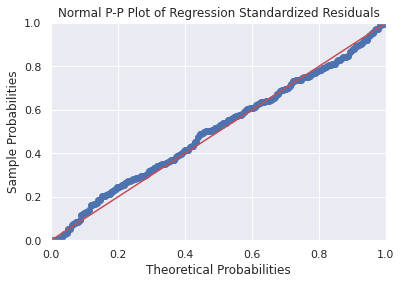

In [79]:
draw_pp_plot( model,
"Normal P-P Plot of Regression Standardized Residuals"
);

In [80]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [81]:
def plot_resid_fitted( fitted, resid, title):
    plt.scatter( get_standardized_values( fitted ),
    get_standardized_values( resid ) )
    plt.title( title )
    plt.xlabel( "Standardized predicted values")
    plt.ylabel( "Standardized residual values")
    plt.show()

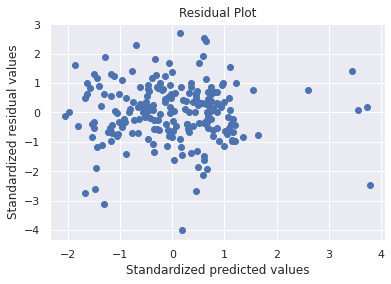

In [82]:
plot_resid_fitted( model.fittedvalues,
                  model.resid,
                  "Residual Plot")

**Regression with sklearn**

In [83]:
## Linear Regression with sklearn
X_rg = new_data.drop(['CollapsePsig','Date','month_year'], axis=1)
y_rg = new_data.CollapsePsig
from sklearn.model_selection import train_test_split
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X_rg, y_rg, test_size=0.20, random_state=101)
print (X_train_rg.shape)
print (y_train_rg.shape)
print (X_test_rg.shape)
print (y_test_rg.shape)

(168, 22)
(168,)
(43, 22)
(43,)


In [84]:
# import model
from sklearn.linear_model import LinearRegression
# instantiate
linreg = LinearRegression()

In [85]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train_rg, y_train_rg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

16339.0134188099
[ 3.86616584e-01 -1.53493080e+01 -2.61673741e-01  2.27950503e-01
  2.53081004e+04 -3.65708686e+03 -2.60788475e+03 -1.26510233e+03
 -4.37255826e+02 -5.59533941e+03  1.61302297e+03  7.75378773e+03
  1.31101780e+04  7.59828729e+02  5.44078076e+01  1.71093045e+02
  2.95943385e+02  2.05388093e+02  3.52877535e+02  4.65130545e-01
  4.29119538e+02 -3.72030523e+01]


**Making predictions**

In [87]:
# make predictions on the testing set
y_pred_rg = linreg.predict(X_test_rg)

In [88]:
y_pred_rg

array([4529.8996151 , 4503.68554494, 4656.05385701, 5065.54483153,
       4919.27889414, 4968.34746833, 4545.78105994, 4465.45305005,
       4849.94687157, 4704.41836856, 4578.06829781, 4544.64620026,
       5046.95629143, 4976.21640151, 5034.02588508, 5012.25143142,
       5076.58051178, 4961.13928867, 4958.16467946, 4424.21786738,
       4954.14694889, 4999.30366377, 4620.20720649, 4850.70325744,
       4772.66390817, 4715.81169827, 5105.18323442, 4934.85615362,
       4955.67316107, 4620.63713915, 4649.35164687, 4750.17972844,
       5055.30106618, 4786.95273987, 4947.28970379, 4836.6399579 ,
       5059.55455632, 4975.1286379 , 4795.92975722, 4650.39716669,
       4651.11637747, 4580.13855404, 5050.1108595 ])

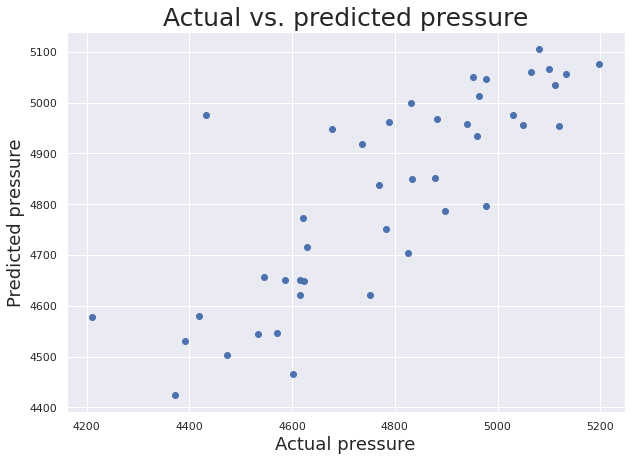

In [103]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted pressure",fontsize=25)
plt.xlabel("Actual pressure",fontsize=18)
plt.ylabel("Predicted pressure", fontsize=18)
plt.scatter(y_test_rg, y_pred_rg)
plt.show()

In [90]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test_rg, y_pred_rg))

103.07487984562508


In [91]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test_rg, y_pred_rg))

20694.63502173723


In [92]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test_rg, y_pred_rg)))

143.85629990284482


In [93]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_rg, y_pred_rg)
print(mape)

2.2007826356141544


**Data Scaling**


In [94]:
from sklearn import preprocessing
X_rg1 = new_data.drop(['CollapsePsig','Date','month_year'], axis=1)
x1 = X_rg1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
X_rg_scaled = pd.DataFrame(x_scaled)
X_rg_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.015504,1.0,0.184708,0.098622,0.480775,0.196721,0.500000,0.070197,0.634444,0.330248,0.288954,0.384615,0.251991,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.007752,1.0,0.884880,0.637418,0.596627,0.057377,0.535714,0.069182,0.069474,0.216979,0.113909,0.520710,0.103903,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.007752,1.0,0.512027,0.343002,0.544198,0.073770,0.910714,0.279896,0.210809,0.768127,0.288035,0.414201,0.433020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.015504,1.0,0.767182,0.608412,0.521606,0.172131,0.375000,0.069974,0.140539,0.987591,0.115214,0.414201,0.348578,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.069767,1.0,0.620275,0.724438,0.292052,0.254098,0.214286,0.107004,0.071637,0.223736,0.176184,0.236686,0.164814,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [95]:
from sklearn.model_selection import train_test_split
X_train_rg_scl, X_test_rg_scl, y_train_rg_scl, y_test_rg_scl = train_test_split(X_rg_scaled, y_rg, test_size=0.20, random_state=101)
print (X_train_rg_scl.shape)
print (y_train_rg_scl.shape)
print (X_test_rg_scl.shape)
print (y_test_rg_scl.shape)

(168, 22)
(168,)
(43, 22)
(43,)


In [96]:
# fit the model to the training data (learn the coefficients)
linreg_std = LinearRegression()
linreg_std.fit(X_train_rg_scl, y_train_rg_scl)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
# make predictions on the testing set
y_pred_rg_scl = linreg_std.predict(X_test_rg_scl)

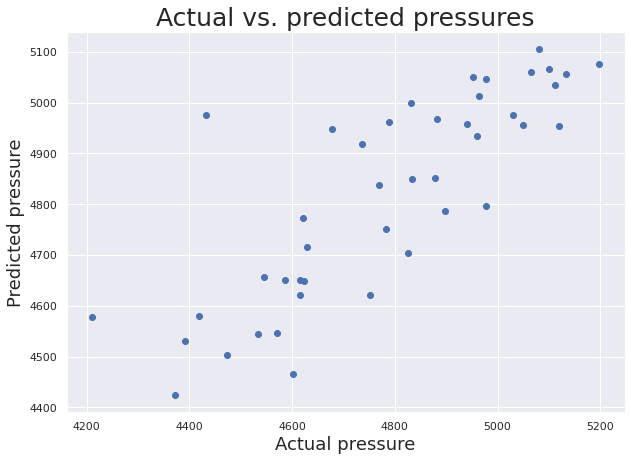

In [102]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted pressures",fontsize=25)
plt.xlabel("Actual pressure",fontsize=18)
plt.ylabel("Predicted pressure", fontsize=18)
plt.scatter(y_test_rg_scl, y_pred_rg_scl)
plt.show()

**Prediction**

In [99]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test_rg_scl, y_pred_rg_scl))
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test_rg_scl, y_pred_rg_scl))
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test_rg_scl, y_pred_rg_scl)))
# calculate MAPE
mape = mean_absolute_percentage_error(y_test_rg_scl, y_pred_rg_scl)
print(mape)



103.07487984562457
20694.635021737944
143.8562999028473
2.2007826356141362


**Feature Selection**

In [104]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [105]:
# Helper function for fitting linear regression (Sklearn)
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [ ]:
#Implementing Best subset selection (using itertools.combinations)
## Warning : this process takes a long time
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = new_data.CollapsePsig
X = new_data.drop(columns = ['CollapsePsig','Date','month_year'], axis = 1)
k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [99]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

In [99]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

In [99]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

**Forward stepwise selection**

In [107]:
#Initialization variables
Y = new_data.CollapsePsig
X = new_data.drop(columns = ['CollapsePsig','Date','month_year'], axis = 1)
k = 11

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [108]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,9)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['ThAvg'], 5980693.0),
 (2, ['ThAvg', 'Supplier_Chung Hung'], 5040333.0),
 (3, ['ThAvg', 'Supplier_Chung Hung', 'AvgODPiTape'], 4567270.0),
 (4,
  ['ThAvg', 'Supplier_Chung Hung', 'AvgODPiTape', 'Supplier_CPW'],
  4034755.0),
 (5,
  ['ThAvg', 'Supplier_Chung Hung', 'AvgODPiTape', 'Supplier_CPW', 'Ovality'],
  3660967.0),
 (6,
  ['ThAvg',
   'Supplier_Chung Hung',
   'AvgODPiTape',
   'Supplier_CPW',
   'Ovality',
   'Eccentricity90270'],
  3439698.0),
 (7,
  ['ThAvg',
   'Supplier_Chung Hung',
   'AvgODPiTape',
   'Supplier_CPW',
   'Ovality',
   'Eccentricity90270',
   'EndPlant_West'],
  3273318.0),
 (8,
  ['ThAvg',
   'Supplier_Chung Hung',
   'AvgODPiTape',
   'Supplier_CPW',
   'Ovality',
   'Eccentricity90270',
   'EndPlant_West',
   'WONo'],
  3206522.0)]

**Comparing models: AIC, BIC, Mallows'CP**

In [109]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [110]:
#Initializing useful variables
from decimal import Decimal, getcontext
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[ThAvg],5.980693e+06,0.582117,1,28492.420780,1.825963,1.841849,0.580117
2,"[ThAvg, Supplier_Chung Hung]",5.040333e+06,0.647822,2,24183.645307,1.549832,1.581603,0.644435
3,"[ThAvg, Supplier_Chung Hung, AvgODPiTape]",4.567270e+06,0.680876,3,22089.548271,1.415629,1.463286,0.676251
4,"[ThAvg, Supplier_Chung Hung, AvgODPiTape, Supp...",4.034755e+06,0.718083,4,19713.682550,1.263370,1.326912,0.712609
5,"[ThAvg, Supplier_Chung Hung, AvgODPiTape, Supp...",3.660967e+06,0.744201,5,18090.084845,1.159320,1.238748,0.737962
6,"[ThAvg, Supplier_Chung Hung, AvgODPiTape, Supp...",3.439698e+06,0.759661,6,17189.320900,1.101594,1.196907,0.752593
7,"[ThAvg, Supplier_Chung Hung, AvgODPiTape, Supp...",3.273318e+06,0.771287,7,16548.696563,1.060539,1.171738,0.763400
8,"[ThAvg, Supplier_Chung Hung, AvgODPiTape, Supp...",3.206522e+06,0.775954,8,16380.031600,1.049730,1.176814,0.767081
9,"[ThAvg, Supplier_Chung Hung, AvgODPiTape, Supp...",3.175758e+06,0.778103,9,16382.135722,1.049865,1.192835,0.768168
10,"[ThAvg, Supplier_Chung Hung, AvgODPiTape, Supp...",3.143085e+06,0.780386,10,16375.196182,1.049420,1.208276,0.769406
